In [208]:
# from pathlib import Path
import os

import cv2

import numpy as np

from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]

# import io
import cProfile as pf
# import pstats
from pstats import SortKey

In [209]:
def read_image(image_path, plot=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if plot:
        plt.imshow(img)
        plt.show()
    return img

def show_compare(images: list, image_names: list = []):
    count = len(images)
    count_names = len(image_names)
    fig, axes = plt.subplots(1, count)
    for cnt in range(count):
        axes[cnt].imshow(images[cnt])
        axes[cnt].axis('off')
        if cnt < count_names:
            axes[cnt].set_title(image_names[cnt])
    plt.show()

In [210]:
def apply_kernel_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    kh, kw = kernel.shape
    H, W, C = image.shape

    pad_h = kernel.shape[0]//2
    pad_v = kernel.shape[1]//2

    image_with_kernel = image.copy()
    image_padded = np.pad(image, ((pad_h, pad_h), (pad_v, pad_v), (0, 0)), mode='edge')

    image_with_kernel = np.zeros_like(image, dtype=np.float32)

    # Беремо кожен канал окремо
    for ch in range(C):
        # Збираємо всі "вікна" зображення під ядро
        windows = np.zeros((H, W, kh, kw), dtype=np.float32)
        for i in range(kh):
            for j in range(kw):
                windows[:, :, i, j] = image_padded[i:i+H, j:j+W, ch]

        # Множимо вікна на ядро і сумуємо
        image_with_kernel[..., ch] = np.sum(windows * kernel, axis=(2, 3))

    # for pixel_row in range(pad_h, image.shape[0]):
    #     for pixel_col in range(pad_v, image.shape[1]):
    #         horizontal_l = pixel_row - pad_h
    #         horizontal_r = pixel_row + pad_h + 1
    #         vertical_l = pixel_col - pad_v
    #         vertical_r = pixel_col + pad_v + 1
    #         region = image_padded[horizontal_l:horizontal_r, vertical_l:vertical_r]

    #         summ = np.sum(region * kernel[..., None], axis=(0, 1))

    #         image_with_kernel[pixel_row - pad_h, pixel_col - pad_v] = summ

    minimum = np.min(image_with_kernel)
    image_with_kernel = (255*(image_with_kernel - minimum)/np.ptp(image_with_kernel)).astype(np.uint8)
    return image_with_kernel

# def apply_kernel_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
#     kh, kw = kernel.shape
#     pad_h, pad_w = kh // 2, kw // 2

#     # Додаємо відступи по краях
#     image_padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode="edge")

#     H, W, C = image.shape
#     filtered = np.zeros_like(image, dtype=np.float32)

#     # Беремо кожен канал окремо
#     for ch in range(C):
#         # Збираємо всі "вікна" зображення під ядро
#         windows = np.zeros((H, W, kh, kw), dtype=np.float32)
#         for i in range(kh):
#             for j in range(kw):
#                 windows[:, :, i, j] = image_padded[i:i+H, j:j+W, ch]

#         # Множимо вікна на ядро і сумуємо
#         filtered[..., ch] = np.sum(windows * kernel, axis=(2, 3))

#     # Нормалізуємо в діапазон [0, 255]
#     minimum = filtered.min()
#     filtered = 255 * (filtered - minimum) / np.ptp(filtered)
#     return filtered.astype(np.uint8)


# def USP(image: np.ndarray, amount: int = 1) -> np.ndarray:
#     image_float = image.astype(float)

#     # Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
#     unsharp = 

#     # Create the difference image (original − unsharp)
#     # Note: Remember that you are working with uint8 data types. Any addition or substractions
#     # might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
#     diff = image_float - unsharp

#     # Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
#     # Note: Again, take care of underflows/overflows if necessary.
#     sharpened = image_float + diff * amount
#     return sharpened

In [211]:
# data_dir = Path("../data")
image_paths = ["../data/" + path for path in os.listdir("../data")]
# image_paths = data_dir.iterdir()
plt.rcParams['figure.figsize'] = [15, 10]

../data/1344829.png


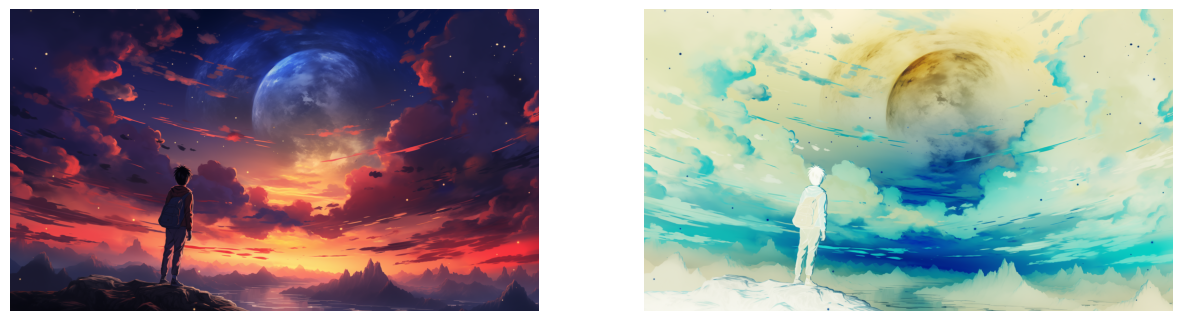

         45849 function calls (44911 primitive calls) in 5.847 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.823    2.823    3.601    3.601 2364861248.py:1(apply_kernel_filter)
        4    0.741    0.185    0.741    0.185 {built-in method matplotlib._image.resample}
      125    0.713    0.006    0.713    0.006 {method 'reduce' of 'numpy.ufunc' objects}
        4    0.575    0.144    1.136    0.284 image.py:585(draw)
        4    0.376    0.094    0.376    0.094 image.py:219(_rgb_to_rgba)
        8    0.210    0.026    0.210    0.026 {built-in method select.select}
        1    0.090    0.090    0.090    0.090 {imread}
        7    0.043    0.006    0.043    0.006 {method 'encode' of 'ImagingEncoder' objects}
        2    0.043    0.022    0.067    0.034 cbook.py:683(safe_masked_invalid)
       11    0.039    0.004    0.039    0.004 {method 'astype' of 'numpy.ndarray' objects}
        1    0.032    0.032  

In [212]:
def main():
    images = []

    for image_path in image_paths:
        print(image_path)
        image = read_image(image_path)
        # print(image.shape < (500, 500, 3))
        # if image.shape < (1000, 1000, 3):
        kernel = np.array([[1/2, 3/4, 1/2], [3/4, 1, 3/4], [1/2, 3/4, 1/2]])
        kernel = np.array([
                    [0, 0, 0],
                    [0, -1, 0],
                    [0, 0, 0]
                ], dtype=np.float32)

        image_padded = apply_kernel_filter(image, kernel)
        show_compare([image, image_padded])
        break


with pf.Profile() as pr:
    main()
    pr.print_stats(SortKey.TIME)